Fake News Detection

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the Figures Inline
%matplotlib inline

#NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import TfidfVectorizer

#Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split

In [6]:
#importing dataset
df = pd.read_csv('fake_news.csv')

df.shape
df.sample(5)


,Unnamed: 0,title,text,subject,date,isFake
12056,12056,KRAUTHAMMER REDEEMS HIMSELF: Trump Should Turn...,HERE ARE KRAUTHAMMER S REMARKS BUT THE FULL VI...,politics,"Dec 27, 2016",1
4392,4392,Trump-Supporting Alaska GOP Candidate Apparen...,"Meet William Quayle Jr., who is trying to give...",News,"October 2, 2016",1
21453,21453,NO WONDER HE’S SMILING: Michigan’s Most Libera...,The average cost for an out of state student t...,left-news,"Sep 17, 2015",1
34279,34279,South Dakota governor considers transgender ba...,(Reuters) - South Dakota would be the first U....,politicsNews,"February 17, 2016",0
8092,8092,"Sorry, Not Sorry: Here Are Some Of The Funnie...",Ordinarily we would not celebrate the death of...,News,"February 15, 2016",1


politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


,Unnamed: 0,title,text,subject,date,isFake,length
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,2893
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,1898
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,3597
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,2774
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,2346


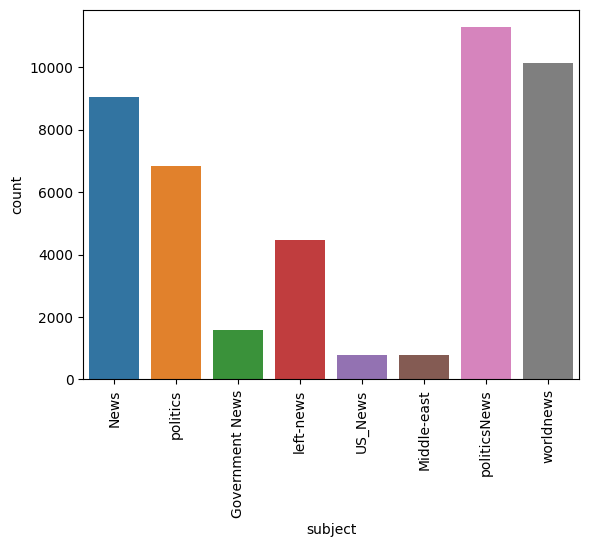

In [26]:
# exploratory data analysis

print( df['subject'].value_counts() )

#no. of news per subject
ax = sns.countplot(x='subject', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#adding additional column for length
df['length']=df['text'].str.len()
df.head()





51794 1


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

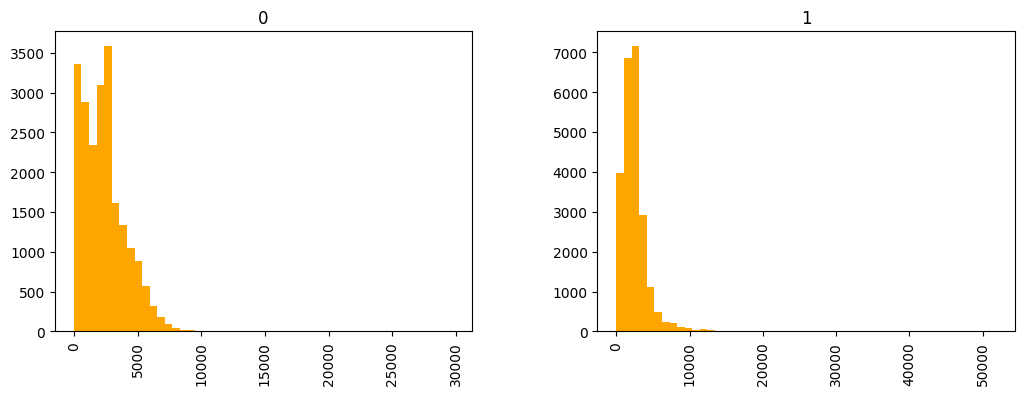

In [30]:
#Cheking max and min length of the News articles
maxlength = df['length'].max()
minlength = df['length'].min()
print(maxlength, minlength)

#Barplots of the article lengths of legitimate vs. fake news.
df.hist(column='length', by='isFake', bins=50,figsize=(12,4),color='orange')  #Most of the news articles have less than 5000 characters.


array([[<Axes: title={'center': 'Government News'}>,
        <Axes: title={'center': 'Middle-east'}>,
        <Axes: title={'center': 'News'}>],
       [<Axes: title={'center': 'US_News'}>,
        <Axes: title={'center': 'left-news'}>,
        <Axes: title={'center': 'politics'}>],
       [<Axes: title={'center': 'politicsNews'}>,
        <Axes: title={'center': 'worldnews'}>, <Axes: >]], dtype=object)

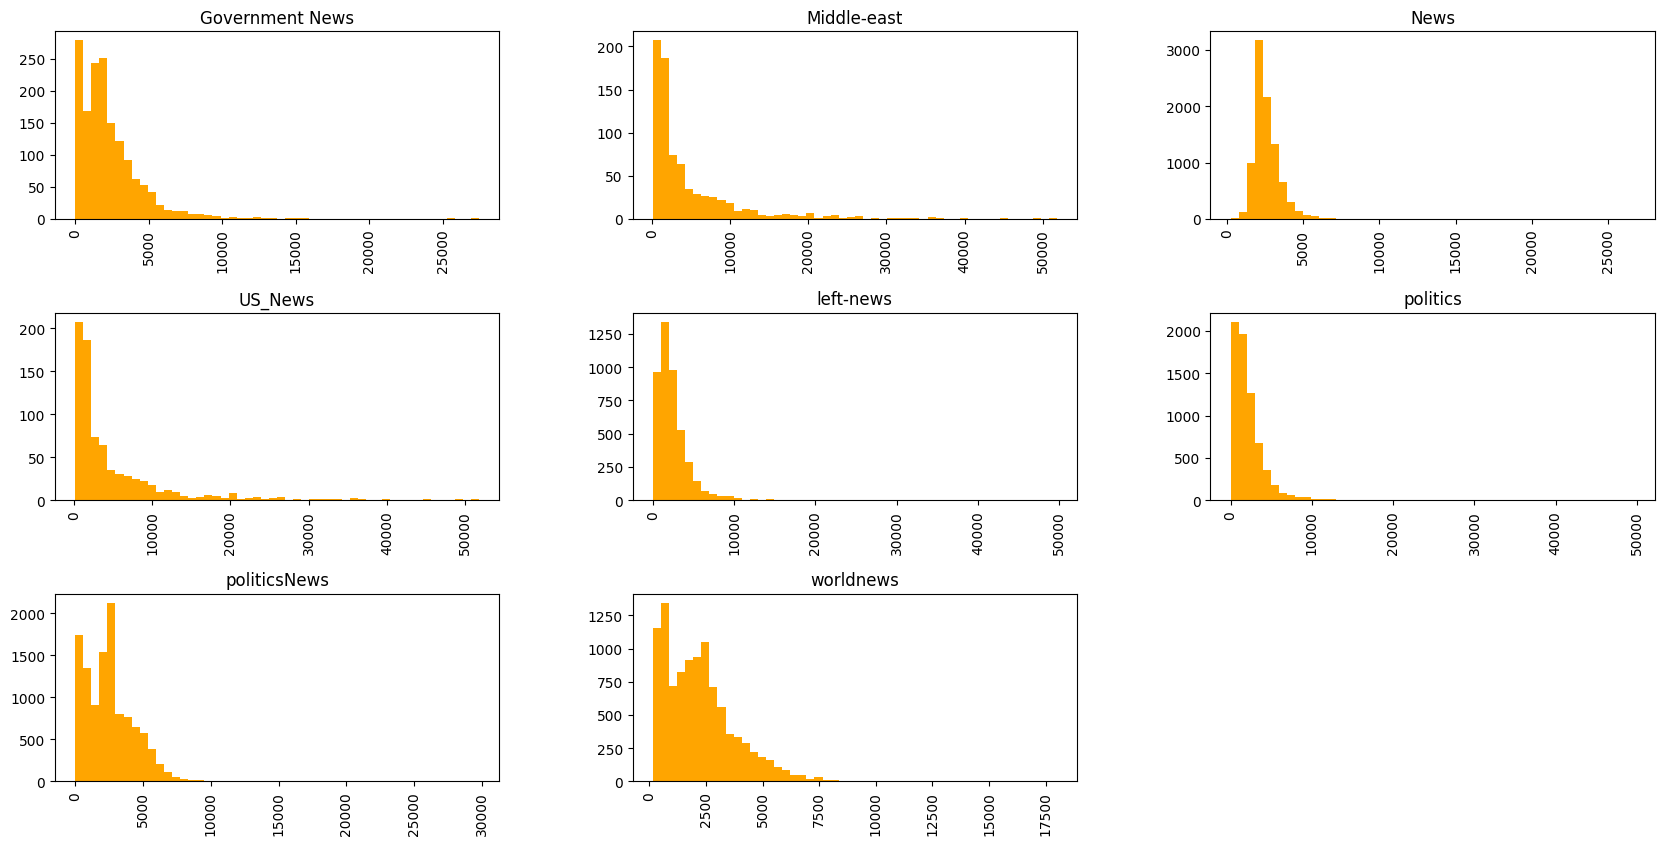

In [31]:
#Length of Articles with respect to the various categories.
df.hist(column='length', by='subject', bins=50,figsize=(20,10),color='orange')

In [ ]:
seite 187